## 潜变量自回归模型
h_t与h_t-1, x_t-1相关； x_t与x_t-1, h_t相关
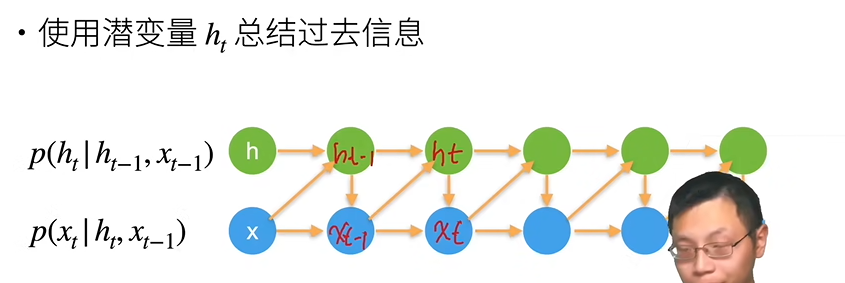

## 循环神经网络 RNN
循环神经网络是具有隐状态的神经网络。与单隐藏层的MLP相比，仅仅是隐藏层的计算多了W_hh * h_t-1。
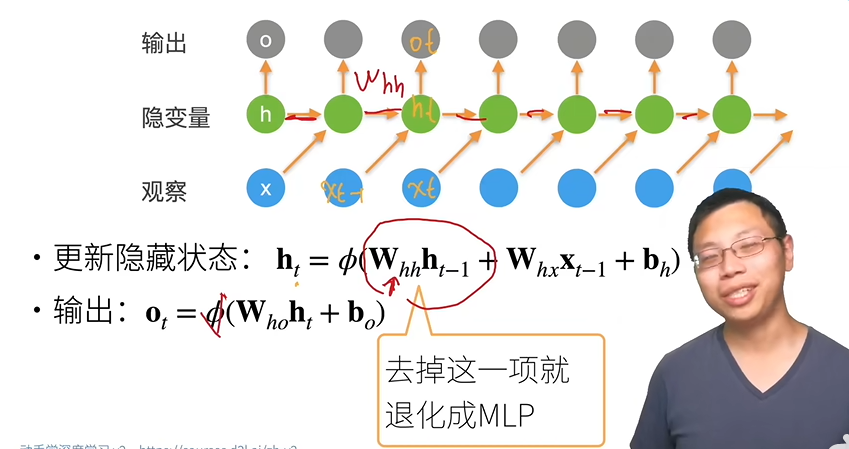
### 使用RNN的语言模型
（重要）循环神经网络的训练样本是一个序列中的一个词元，通过该词元预测输出的词元（也就是分类问题），且对于下一个样本词元的预测还需要使用上一个样本词元隐藏层的输出向量h。因此RNN不能并行计算。
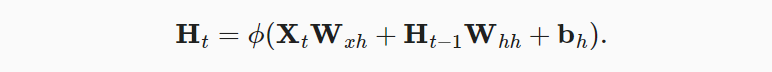
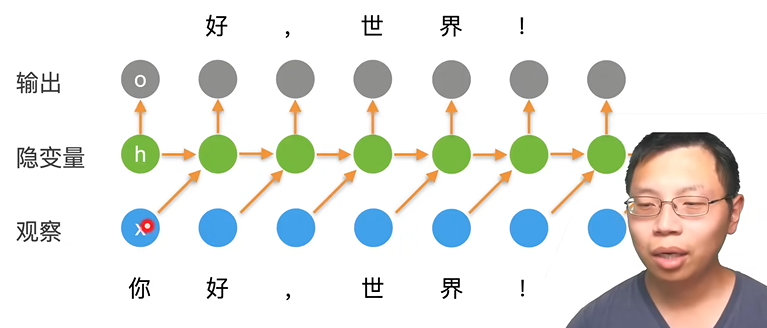

X的尺寸：n * d （样本特征维度为d）, 其权重矩阵W_xh的尺寸：d * h

H的尺寸：n * h （因为模型中隐藏层输出为h），其权重矩阵W_hh的尺寸：h * h (想想nn.Linear的权重矩阵尺寸的计算方式，一个道理)

因此，循环神经网络的参数开销不会随着样本词元的增加而增加。

## 语言模型常用的衡量标准——困惑度
困惑度 = 平常用的交叉熵损失取个均值再取个指数
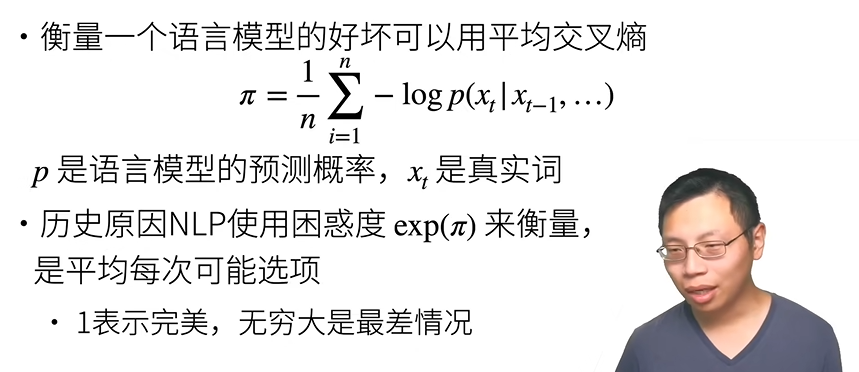

## 梯度裁剪
theta一般取5或10，如果梯度长度超过theta，则会把它长度变为theta
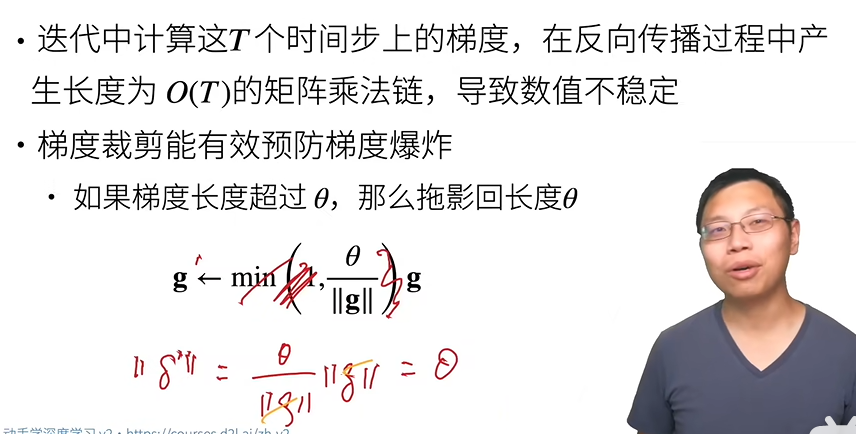
#### RNN一般需要做梯度剪裁

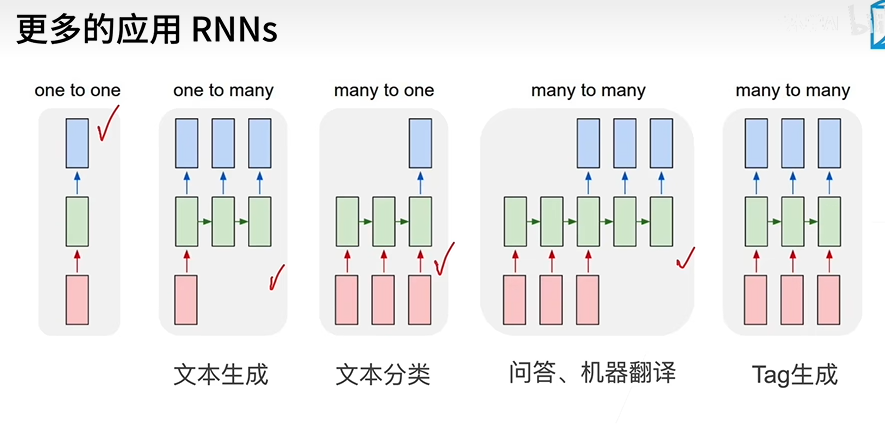
one to one: MLP干的事，数据没有时序关系。
文本分类：读完文本序列后进行分类。
问答、机器翻译：读完文本序列后生成一段文本。
Tag生成，例如：对每个单词判断词性。

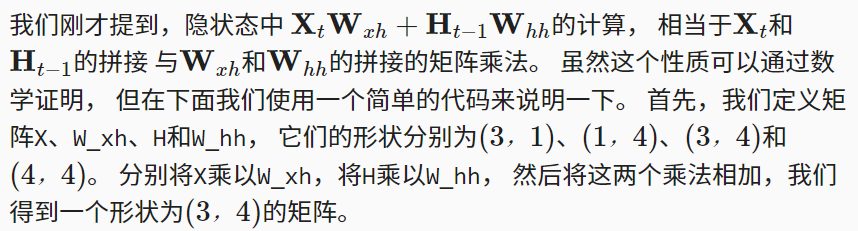

In [1]:
import torch
from d2l import torch as d2l

X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-2.3185, -0.2271, -4.8670, -0.3311],
        [-4.2063,  2.0070, -1.7018, -0.5334],
        [-0.3631, -2.6079, -5.0588, -2.1776]])

（理解）现在，我们沿 axis=1 拼接矩阵X和H（相当于拓展了特征维度）， 沿行 axis=0 拼接矩阵W_xh和W_hh 。 如此计算能得到同样的结果，因为其实RNN本质就是在MLP隐藏层的计算上进行了一些改动，特征不仅仅是当前词元样本本身，还有上个样本隐藏层的输出。

In [2]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[-2.3185, -0.2271, -4.8670, -0.3311],
        [-4.2063,  2.0070, -1.7018, -0.5334],
        [-0.3631, -2.6079, -5.0588, -2.1776]])

## 基于RNN的字符级语言模型

输出O_3与字符'm','a','c'都有关，因为O_3由H3计算出来，H3由H2和'c'计算，H2由H1和'a'计算，H1由H0和m计算出，因此可以得出H3与字符'm','a','c'都有关
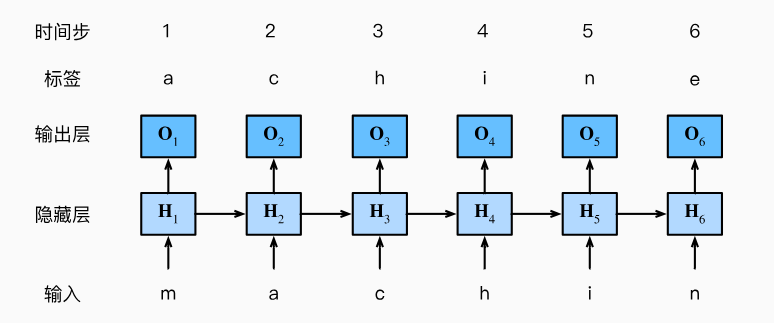